# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE II: Modelos Supervisados

### by Marta Buesa

#### Febrero 2022 


![MartaBuesaProyectoML](portada_ML.png)

# 1. Importo librerias

In [1165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Importo datasets
## TRAIN

### X_train NO estandarizado

In [1166]:
X_train = pd.read_csv('csvs/X_train_modified.csv')
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,26.0,0.148000,0.481,345253.0,0.776,-1.493326,-0.329894,-8.404,1.000000,0.0388,...,1,0,0,0,0,0,0,0,0,0
1,21.0,0.960000,0.242,480013.0,0.113,-0.167240,-2.180367,-21.232,0.179818,0.0349,...,0,0,0,0,0,0,1,0,0,0
2,47.0,0.328000,0.798,219960.0,0.538,-3.868285,-1.703749,-11.412,0.179818,0.0363,...,0,0,0,0,0,0,0,0,1,0
3,39.0,0.031800,0.573,219019.0,0.743,-1.493326,-1.883875,-6.047,1.000000,0.0374,...,0,0,0,0,0,0,0,0,1,0
4,58.0,0.000006,0.427,265640.0,0.906,-0.207082,-1.777857,-3.488,0.179818,0.0472,...,0,0,1,0,0,0,0,0,0,0
5,29.0,0.001180,0.410,225093.0,0.988,-2.062738,-1.164752,-2.381,1.000000,0.1410,...,0,0,0,0,0,0,0,1,0,0
6,30.0,0.004140,0.624,251000.0,0.605,-4.371529,-2.154165,-7.900,0.179818,0.0313,...,0,0,0,0,0,0,0,0,0,0
7,28.0,0.001980,0.481,202707.0,0.956,-1.493326,-1.111698,-4.094,0.179818,0.0509,...,0,0,0,0,0,0,0,0,0,0
8,57.0,0.097600,0.921,234787.0,0.480,-1.493326,-2.566551,-9.200,1.000000,0.0823,...,0,0,0,0,0,0,0,0,0,0
9,52.0,0.000690,0.497,230513.0,0.956,-5.387271,-1.754464,-4.383,1.000000,0.0445,...,0,0,0,0,0,0,0,0,1,0


### X_train estandarizado

In [1167]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled.csv')
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_train_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,-1.181905,-0.460124,-0.443239,1.288685,0.659647,0.525620,2.361115,0.109311,1.342698,-0.541965,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,-1.504704,1.925870,-1.789203,2.919348,-1.853332,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,0.173848,0.068791,1.341994,-0.227422,-0.242448,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,-0.342630,-0.801568,0.074873,-0.238809,0.534566,0.525620,0.006656,0.497551,1.342698,-0.555777,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,0.884005,-0.894991,-0.747348,0.325328,1.152388,1.249039,0.167285,0.919065,-0.744769,-0.459096,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
5,-0.988226,-0.891543,-0.843086,-0.165311,1.463193,0.205367,1.096209,1.101408,1.342698,0.466274,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
6,-0.923667,-0.882845,0.362087,0.148177,0.011503,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-1.052786,-0.889192,-0.443239,-0.436192,1.341903,0.525620,1.176593,0.819246,-0.744769,-0.422594,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,0.819445,-0.608220,2.034687,-0.048008,-0.462287,0.525620,-1.027677,-0.021805,1.342698,-0.112822,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
9,0.496646,-0.892982,-0.353132,-0.099726,1.341903,-1.664443,0.202728,0.771642,1.342698,-0.485733,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_train con label encoder

In [1168]:
y_train = pd.read_csv('csvs/y_train_transformed.csv')
#y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train.head(10)

,music_genre
0,2
1,3
2,2
3,4
4,0
5,2
6,5
7,1
8,0
9,0


In [1169]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 23)
(39719, 23)
(39719, 1)


## TEST

### X_test NO standarizado

In [1170]:
X_test = pd.read_csv('csvs/X_test_modified.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,60.0,0.9150,0.487,219019.0,0.135,-3.636274,-0.376878,-11.211,1,0.0434,...,0,0,0,0,0,1,0,0,0,0
1,33.0,0.0169,0.483,158067.0,0.903,-2.310026,-2.162823,-5.767,1,0.0738,...,0,0,0,0,0,0,0,0,0,0
2,36.0,0.6380,0.396,314800.0,0.380,-0.176439,-2.198225,-12.908,1,0.0429,...,0,0,0,0,1,0,0,0,0,0
3,63.0,0.8340,0.518,196493.0,0.543,-1.489131,-1.609438,-10.766,0,0.0297,...,0,0,0,0,0,0,0,0,0,0
4,72.0,0.0996,0.715,130929.0,0.617,-5.206685,-1.682009,-5.558,1,0.2400,...,0,0,0,0,0,0,0,1,0,0
5,59.0,0.1800,0.595,220133.0,0.427,-5.026046,-2.111965,-6.764,1,0.0540,...,1,0,0,0,0,0,0,0,0,0
6,36.0,0.4500,0.447,380933.0,0.843,-2.076720,-2.570465,-6.657,1,0.0860,...,1,0,0,0,0,0,0,0,0,0
7,33.0,0.0247,0.794,301977.0,0.685,-2.958689,-1.555897,-5.294,1,0.0779,...,0,0,0,0,1,0,0,0,0,0
8,40.0,0.0246,0.536,218040.0,0.598,-3.606730,-0.673345,-6.266,0,0.0279,...,0,0,0,0,0,0,0,0,1,0
9,54.0,0.1890,0.512,304427.0,0.543,-4.202528,-1.130103,-6.857,0,0.0343,...,0,0,0,0,0,0,0,0,1,0


### X_test estandarizado

In [1171]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled.csv')
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_test_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,1.013124,1.793641,-0.409449,-0.238809,-1.769945,-0.679633,2.289930,-0.353053,1.342698,-0.496585,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,-0.729988,-0.845351,-0.431976,-0.976358,1.141017,0.066285,-0.415983,0.543672,1.342698,-0.196678,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,-0.536309,0.979700,-0.921929,0.920189,-0.841318,1.266274,-0.469621,-0.632580,1.342698,-0.501517,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,1.206803,1.555630,-0.234868,-0.511385,-0.223497,0.527979,0.422459,-0.279753,-1.202430,-0.631740,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,1.787840,-0.602344,0.874567,-1.304742,0.056987,-1.562876,0.312506,0.578098,1.342698,1.442945,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
5,0.948564,-0.366095,0.198769,-0.225329,-0.663173,-1.461280,-0.338927,0.379448,1.342698,-0.392012,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
6,-0.536309,0.427278,-0.634715,1.720431,0.913598,0.197503,-1.033607,0.397073,1.342698,-0.076320,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-0.729988,-0.822431,1.319468,0.765024,0.314728,-0.298540,0.503579,0.621584,1.342698,-0.156230,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,-0.278070,-0.822725,-0.133498,-0.250655,-0.015029,-0.663017,1.840748,0.461478,-1.202430,-0.649498,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
9,0.625766,-0.339649,-0.268658,0.794670,-0.223497,-0.998110,1.148707,0.364130,-1.202430,-0.586359,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_test con label encoder

In [1172]:
y_test = pd.read_csv('csvs/y_test_transformed.csv')
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.head(10)

,music_genre
0,7
1,2
2,7
3,9
4,6
5,8
6,7
7,5
8,4
9,9


In [1173]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 23)
(9943, 23)
(9943, 1)


### Generos_musicales 

* 'Alternative': 0
* 'Anime': 1 
* 'Blues': 2 
* 'Classical': 3
* 'Country': 4
* 'Electronic': 5 
* 'Hip-Hop': 6
* 'Jazz': 7
* 'Rap': 8
* 'Rock': 9

# 3. Modelos Machine Learning: Predicción Categórica

# 3.1. LOGISTIC REGRESSION

### Importo librerias necesarias

In [1174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Preparo el modelo y lo entreno

In [1175]:
# Modelo Log Reg Clas
log_reg = LogisticRegression(multi_class='multinomial')

# Entreno el modelo
log_reg.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

### Atributos Logistic Regression

In [1176]:
log_reg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [1177]:
# Number of features seen during fit
log_reg.n_features_in_

23

In [1178]:
# Names of features seen during fit
log_reg.feature_names_in_

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI',
       'key_SOL', 'key_SOL#'], dtype=object)

In [1179]:
# Intercept (a.k.a. bias) added to the decision function.
log_reg.intercept_

array([ 1.25363891, -0.63539245,  0.80937318, -1.46982971,  0.89068527,
        0.86287046, -1.19206495,  1.37612996, -1.41078138, -0.48462928])

### Predicción en TRAIN

In [1180]:
# Prediccion en Train
y_train_pred = log_reg.predict(X_train_scal)
y_train_pred.shape

(39719,)

In [1181]:
y_train.shape

(39719, 1)

In [1182]:
def mostrar_resultados(muestra, truee, pred):
    '''
    Función que muestra los resultados del modelo: matriz de confusión y reporte de aciertos en laclasificación entre los generos musicales
    '''
    c_matrix = confusion_matrix(truee, pred)
    plt.figure(figsize=(15,10))
    if muestra == 'TRAIN':
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Blues');
    else:
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(truee, pred))

Resultados Logistic Regression en TRAIN:


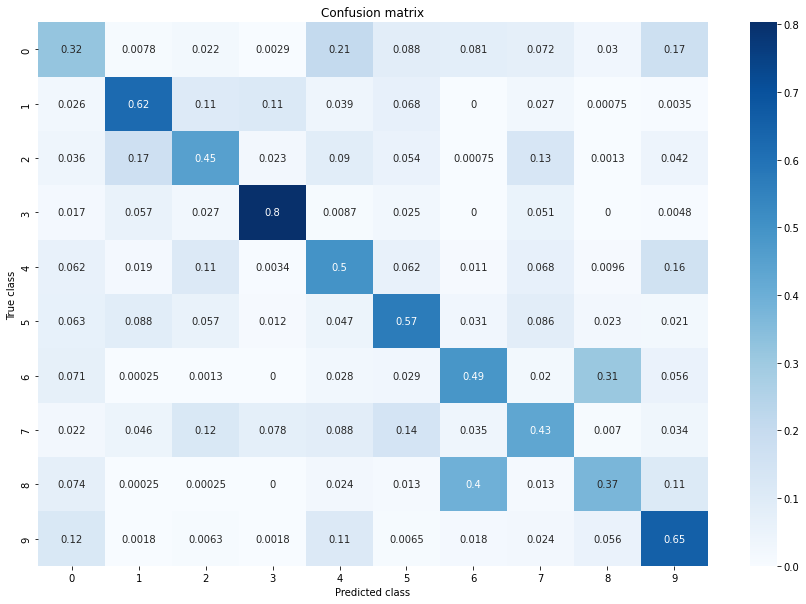

              precision    recall  f1-score   support

           0       0.39      0.32      0.35      3995
           1       0.62      0.62      0.62      3989
           2       0.50      0.45      0.47      3951
           3       0.77      0.80      0.79      3852
           4       0.44      0.50      0.47      4011
           5       0.54      0.57      0.55      3975
           6       0.46      0.49      0.47      3984
           7       0.47      0.43      0.45      3999
           8       0.46      0.37      0.41      3976
           9       0.52      0.65      0.58      3987

    accuracy                           0.52     39719
   macro avg       0.52      0.52      0.52     39719
weighted avg       0.52      0.52      0.52     39719



In [1183]:
# Prediccion en TRAIN
print('Resultados Logistic Regression en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_train_pred)

#### **Métrica de precisión** 
Se mide la calidad del modelo de machine learning en tareas de clasificación, es decir **los identificados como True Positive sobre el total de los predichos positivos**:

**precision = {TP}/{TP + FP}**


#### **Métrica de recall(exhaustividad)** 
Informa la cantidad que el modelo de machine learning es capaz de identificar, es decir los **identificados como True Positive sobre el total real de positivos**:

**recall = {TP}{TP + FN}**

#### **Puntuación F1** 
Es una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. La contribución relativa de precisión y recuperación a la puntuación F1 es igual. La fórmula para la puntuación F1 es:

**F1 = 2 * (precision * recall) / (precision + recall)**

En el caso de multiclase y multietiqueta, es el promedio de la puntuación F1 de cada clase con ponderación según el average parámetro.


#### **Promedios informados** incluyen:
* **Macro average** (promedio macro): promedio de la media no ponderada por etiqueta
* **Weighted average** (promedio ponderado) promedio de la media ponderada por soporte por etiqueta

#### **Support**: The number of occurrences of each label in y_true.

In [1184]:
acierto = accuracy_score(y_train, y_train_pred)
error = 1 - acierto

print('Score Logistic Regression en TRAIN:\n-----------------------------')
print("Accuracy train:", round(acierto*100, 2), "%")
print("Error train:", round(error*100, 2), "%")

Score Logistic Regression en TRAIN:
-----------------------------
Accuracy train: 51.99 %
Error train: 48.01 %


### Predicción en TEST

In [1185]:
# Prediccion en Test
y_test_pred = log_reg.predict(X_test_scal)
y_test_pred.shape

(9943,)

Resultados Logistic Regression en TEST:


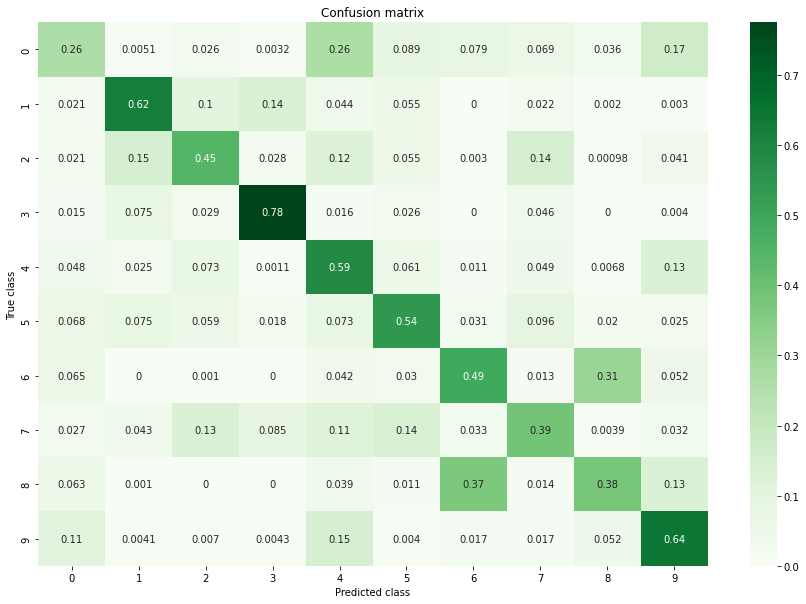

              precision    recall  f1-score   support

           0       0.37      0.26      0.31      1002
           1       0.62      0.62      0.62       987
           2       0.51      0.45      0.48      1000
           3       0.74      0.78      0.76       930
           4       0.41      0.59      0.48       986
           5       0.54      0.54      0.54      1008
           6       0.47      0.49      0.48      1015
           7       0.45      0.39      0.42       981
           8       0.47      0.38      0.42      1023
           9       0.52      0.64      0.58      1011

    accuracy                           0.51      9943
   macro avg       0.51      0.51      0.51      9943
weighted avg       0.51      0.51      0.51      9943



In [1186]:
print('Resultados Logistic Regression en TEST:')
mostrar_resultados('TEST',y_test, y_test_pred)

In [1187]:
acierto = accuracy_score(y_test, y_test_pred)
error = 1 - acierto

print('Score Logistic Regression en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Logistic Regression en TEST:
-----------------------------
Accuracy test: 51.16 %
Error test: 48.84 %


### Guardo CSV con resultados obtenidos en Logistic Regression en TEST

In [1188]:
results_log = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_test_pred,output_dict=True)).transpose()

results_log = results_log.add_prefix('LogReg_')
results_log.rename(columns={'LogReg_support' : 'Support (Registros)'}, inplace=True)
results_log = results_log.reindex(columns=['Support (Registros)','LogReg_precision','LogReg_recall','LogReg_f1-score'])
results_log

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score
0,1002.000000,0.372126,0.258483,0.305065
1,987.000000,0.623350,0.622087,0.622718
2,1000.000000,0.513173,0.448000,0.478377
3,930.000000,0.737219,0.775269,0.755765
4,986.000000,0.406887,0.587221,0.480697
5,1008.000000,0.537255,0.543651,0.540434
6,1015.000000,0.472831,0.488670,0.480620
7,981.000000,0.452607,0.389399,0.418630
8,1023.000000,0.469240,0.380254,0.420086
9,1011.000000,0.522472,0.643917,0.576872


In [1189]:
results_log.to_csv('models/logistic_regresion_report_on_test.csv', index= True)

### Tabla scores obtenidos

Quiero comparar resultados obtenidos en cada modelo, asi que creo un data frame donde almacenaré los accuracys obtenidos en cada uno

##### Utilizo el accuracy dado que mi target está bien balanceado

In [1190]:
scores_obtained = {'Regresión logistica(%)': [accuracy_score(y_train, y_train_pred)*100,
                    accuracy_score(y_test, y_test_pred)*100]}

scores_obtained = pd.DataFrame(scores_obtained, index=['Accuracy_train', 'Accuracy_test'])

scores_obtained

,Regresión logistica(%)
Accuracy_train,51.987714
Accuracy_test,51.161621


# 3.2. DECISION TREE CLASSIFIER

### Importo librerias necesarias

In [1191]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Preparo y entreno modelo Decision Tree

In [1192]:
# Creo modelo
tree_clf = DecisionTreeClassifier()

# Entreno
tree_clf.fit(X_train_scal, y_train)

DecisionTreeClassifier()

#### Grid Search: para ver cuanta profundidad y cantidad de muestras darle al árbol de decisión, para que no caiga en overfitting

In [1193]:
# Pruebo profundidad maxima de 2, 3, 4, 5, 6, 7, 8, 9, 10
# Cantidad de muestras en las que se divide para llegar a una hoja
parameters = {'max_depth': [5,6,7,8,9,10],
'min_samples_leaf': np.arange(1,10)}

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_tree = GridSearchCV(tree_clf, parameters, scoring= 'accuracy', cv=10)

grid_tree.fit(X_train_scal, y_train)

print(grid_tree.best_estimator_)
print(grid_tree.best_score_)
print(grid_tree.best_params_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=7)
0.5165286189932399
{'max_depth': 10, 'min_samples_leaf': 7}


#### Aplico el modelo con la max_depth y min_samples_leaf que me devuelve el gridsearch que sería mejor

In [1194]:
# modelo Deccision Tree Classifier
tree10_1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)

#  Entreno el modelo
tree10_1.fit(X_train_scal, y_train)

DecisionTreeClassifier(max_depth=10)

### Atributos del árbol de Decisión

In [1195]:
tree10_1.feature_names_in_

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI',
       'key_SOL', 'key_SOL#'], dtype=object)

In [1196]:
tree10_1.feature_importances_

array([3.53886032e-01, 6.68728228e-02, 8.92469461e-02, 2.02442834e-02,
       3.24751563e-02, 8.10718036e-02, 5.06709599e-03, 1.69534412e-01,
       8.77632298e-03, 1.14336193e-01, 1.30111785e-02, 4.10410242e-02,
       7.90508878e-04, 4.96418680e-04, 4.41187419e-04, 4.33636928e-04,
       2.83956695e-04, 3.04936968e-04, 3.24551790e-04, 1.20021267e-04,
       4.78669181e-04, 2.34510278e-04, 5.28331509e-04])

In [1197]:
order_fea_imp_tree = pd.Series(tree10_1.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp_tree

tempo               0.013011
duration_ms         0.020244
energy              0.032475
valence             0.041041
acousticness        0.066873
instrumentalness    0.081072
danceability        0.089247
speechiness         0.114336
loudness            0.169534
popularity          0.353886
dtype: float64

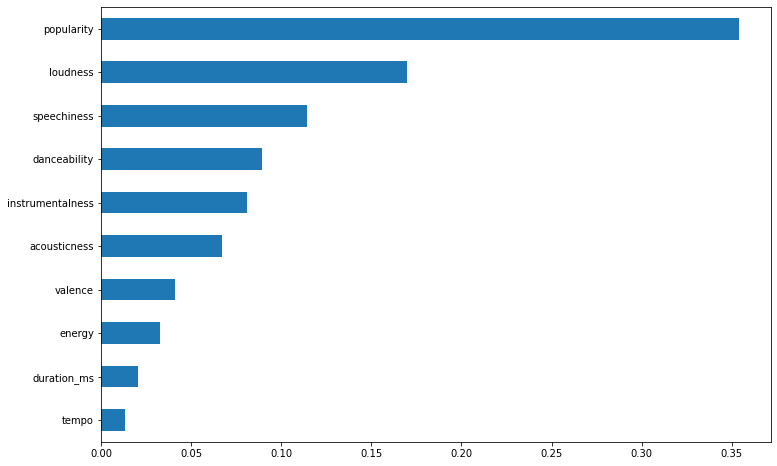

In [1198]:
order_fea_imp_tree.plot(kind='barh', figsize= (12,8));

### Visualización del árbol

In [1199]:
y_train= pd.DataFrame(y_train)

generos_music = y_train.music_genre.unique()
generos_music

array([2, 3, 4, 0, 5, 1, 8, 7, 9, 6], dtype=int64)

In [1200]:
train_complete = pd.concat([X_train_scal, y_train], axis=1)
train_complete.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,-1.181905,-0.460124,-0.443239,1.288685,0.659647,0.525620,2.361115,0.109311,1.342698,-0.541965,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,2
1,-1.504704,1.925870,-1.789203,2.919348,-1.853332,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344,3
2,0.173848,0.068791,1.341994,-0.227422,-0.242448,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,2
3,-0.342630,-0.801568,0.074873,-0.238809,0.534566,0.525620,0.006656,0.497551,1.342698,-0.555777,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,4
4,0.884005,-0.894991,-0.747348,0.325328,1.152388,1.249039,0.167285,0.919065,-0.744769,-0.459096,...,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,0


In [1201]:
X_train_scal.columns[0:2].tolist()

['popularity', 'acousticness']

In [1202]:
train_complete.music_genre.unique().astype('str')

array(['2', '3', '4', '0', '5', '1', '8', '7', '9', '6'], dtype='<U21')

In [1203]:
train_complete.music_genre.unique().astype('str').tolist()

['2', '3', '4', '0', '5', '1', '8', '7', '9', '6']

### Predicción sobre TRAIN

In [1204]:
# Prediccion sobre TRAIN
tree_predictions_train = tree10_1.predict(X_train_scal)

Resultados Decision Tree en TRAIN:


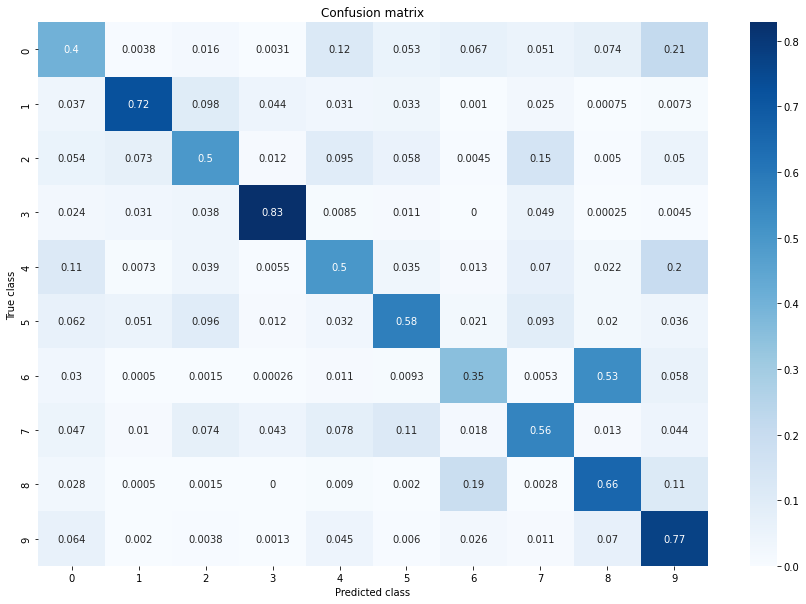

              precision    recall  f1-score   support

           0       0.47      0.40      0.43      3995
           1       0.80      0.72      0.76      3989
           2       0.57      0.50      0.53      3951
           3       0.87      0.83      0.85      3852
           4       0.54      0.50      0.52      4011
           5       0.64      0.58      0.61      3975
           6       0.51      0.35      0.42      3984
           7       0.55      0.56      0.56      3999
           8       0.47      0.66      0.55      3976
           9       0.52      0.77      0.62      3987

    accuracy                           0.59     39719
   macro avg       0.59      0.59      0.58     39719
weighted avg       0.59      0.59      0.58     39719



In [1205]:
print('Resultados Decision Tree en TRAIN:')
mostrar_resultados('TRAIN', y_train, tree_predictions_train)

In [1206]:
acierto = accuracy_score(y_train, tree_predictions_train)
error = 1 - acierto

print('Score con Decision Tree en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Decision Tree en TRAIN:
-----------------------------
Accuracy Train: 58.56 %
Error Train : 41.44 %


### Predicción sobre TEST

In [1207]:
# Prediccion en Test
tree_predictions_test = tree10_1.predict(X_test_scal)
tree_predictions_test.shape

(9943,)

Resultados Decision Tree en TEST:


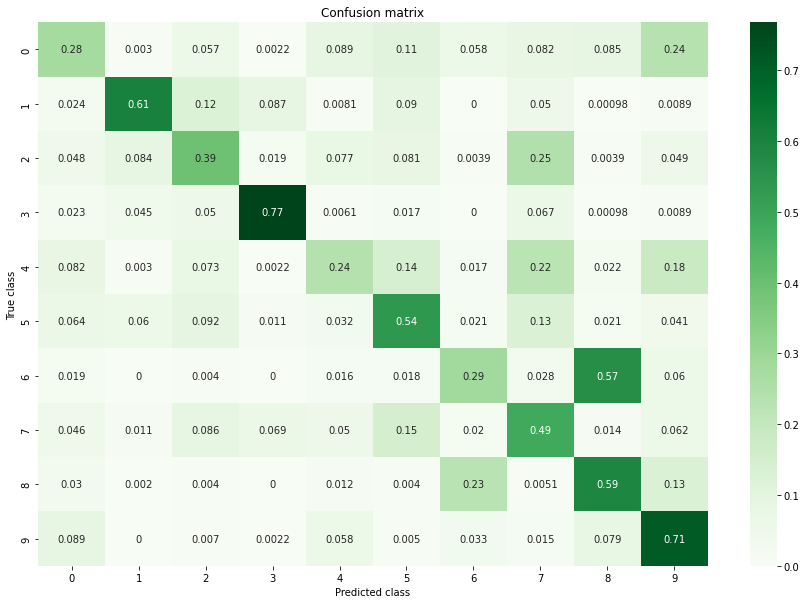

              precision    recall  f1-score   support

           0       0.40      0.28      0.33      1002
           1       0.75      0.61      0.67       987
           2       0.44      0.39      0.42      1000
           3       0.80      0.77      0.78       930
           4       0.40      0.24      0.30       986
           5       0.46      0.54      0.50      1008
           6       0.43      0.29      0.34      1015
           7       0.36      0.49      0.42       981
           8       0.43      0.59      0.50      1023
           9       0.48      0.71      0.57      1011

    accuracy                           0.49      9943
   macro avg       0.50      0.49      0.48      9943
weighted avg       0.49      0.49      0.48      9943



In [1208]:
print('Resultados Decision Tree en TEST:')
mostrar_resultados('TEST', y_test, tree_predictions_test)

In [1209]:
acierto = accuracy_score(y_test, tree_predictions_test)
error = 1 - acierto

print('Score Decision Tree en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Decision Tree en TEST:
-----------------------------
Accuracy test: 48.83 %
Error test: 51.17 %


### Guardo CSV con resultados obtenidos en Decision Tree en TEST

In [1210]:
results_tree = pd.DataFrame(classification_report(y_true = y_test, y_pred = tree_predictions_test,output_dict=True)).transpose()

results_tree = results_tree.add_prefix('DecTree_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222


In [1211]:
results_tree.to_csv('models/decision_tree_report_on_test.csv', index= True)

In [1212]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Decision Tree

In [1213]:
scores_obtained['Decision Tree(%)'] = [accuracy_score(y_train, tree_predictions_train)*100,
                                    accuracy_score(y_test, tree_predictions_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%)
Accuracy_train,51.987714,58.558876
Accuracy_test,51.161621,48.828321


# 3.3. SUPPORT VECTOR MACHINE (SVM)

### Importo librerias necesarias

In [1214]:
from sklearn.svm import LinearSVC

### Preparo y entreno el modelo Support Vector Machine

In [1215]:
# Parámetro C: Cuanto menor es C, más es la flexibilidad/tolerante es mi modelo, y por tanto generalizará mejor
svm_lin1 = LinearSVC(C=1)
svm_lin2 = LinearSVC(C=100)


In [1216]:
# Entrenamiento
svm_lin1.fit(X_train_scal, y_train.values.ravel())
svm_lin2.fit(X_train_scal, y_train.values.ravel())


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100)

### Predicción sobre Train

In [1217]:
# Prediccion sobre TRAIN
svm_lin1_predictions_train = svm_lin1.predict(X_train_scal)
svm_lin2_predictions_train = svm_lin2.predict(X_train_scal)

Resultados SUPPORT VECTOR MACHINE Lineal1 en TRAIN:


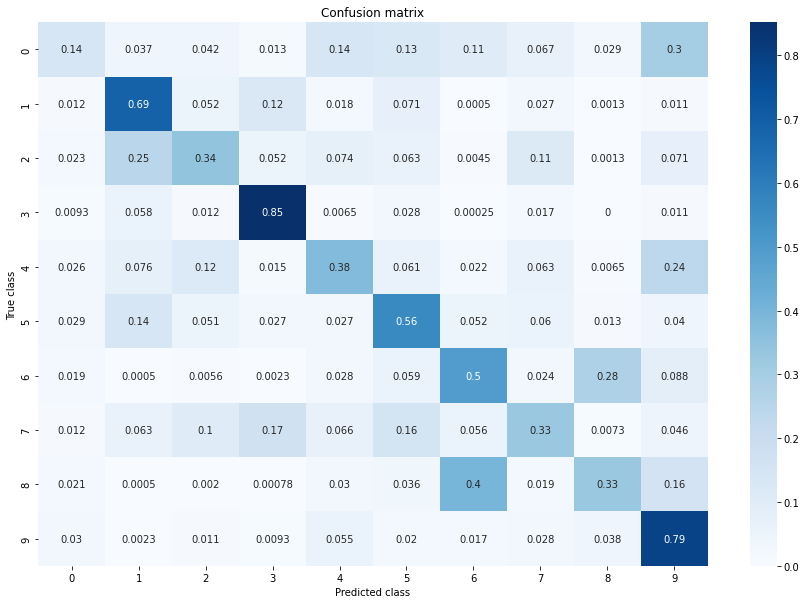

              precision    recall  f1-score   support

           0       0.44      0.14      0.21      3995
           1       0.52      0.69      0.59      3989
           2       0.46      0.34      0.40      3951
           3       0.67      0.85      0.75      3852
           4       0.46      0.38      0.41      4011
           5       0.47      0.56      0.51      3975
           6       0.43      0.50      0.46      3984
           7       0.44      0.33      0.38      3999
           8       0.47      0.33      0.38      3976
           9       0.45      0.79      0.57      3987

    accuracy                           0.49     39719
   macro avg       0.48      0.49      0.47     39719
weighted avg       0.48      0.49      0.47     39719



Resultados SUPPORT VECTOR MACHINE Lineal2 en TRAIN:


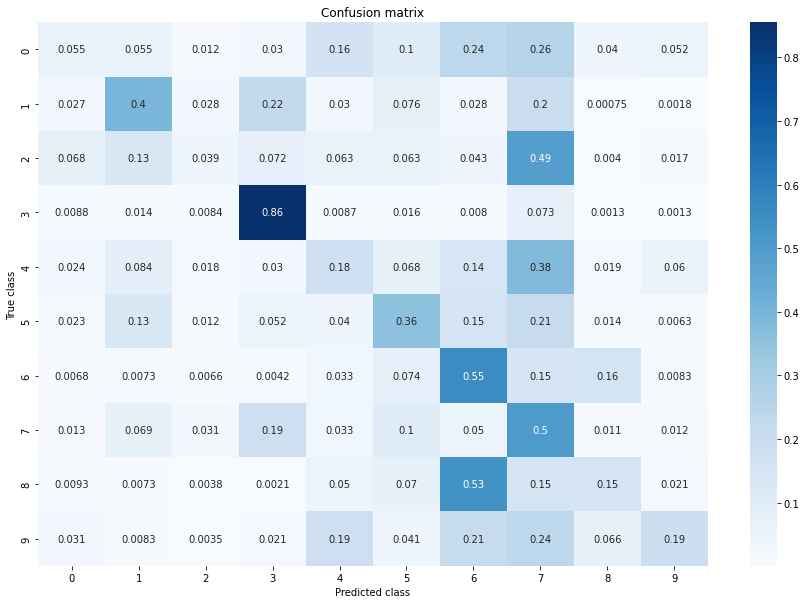

              precision    recall  f1-score   support

           0       0.21      0.06      0.09      3995
           1       0.44      0.40      0.42      3989
           2       0.24      0.04      0.07      3951
           3       0.58      0.86      0.69      3852
           4       0.23      0.18      0.20      4011
           5       0.37      0.36      0.36      3975
           6       0.28      0.55      0.37      3984
           7       0.19      0.50      0.28      3999
           8       0.33      0.15      0.21      3976
           9       0.52      0.19      0.28      3987

    accuracy                           0.33     39719
   macro avg       0.34      0.33      0.30     39719
weighted avg       0.34      0.33      0.29     39719



In [1218]:
print('Resultados SUPPORT VECTOR MACHINE Lineal1 en TRAIN:')
mostrar_resultados('TRAIN', y_train, svm_lin1_predictions_train)

print('\n\nResultados SUPPORT VECTOR MACHINE Lineal2 en TRAIN:')
mostrar_resultados('TRAIN', y_train, svm_lin2_predictions_train)

In [1219]:
acierto = accuracy_score(y_train, svm_lin1_predictions_train)
error = 1 - acierto

print('Score con SVM Lineal1 en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')


acierto = accuracy_score(y_train, svm_lin2_predictions_train)
error = 1 - acierto

print('\n\nScore con SVM Lineal2 en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con SVM Lineal1 en TRAIN:
-----------------------------
Accuracy Train: 48.88 %
Error Train : 51.12 %


Score con SVM Lineal2 en TRAIN:
-----------------------------
Accuracy Train: 32.65 %
Error Train : 67.35 %


### Predicción sobre TEST

In [1220]:
# Prediccion en Test

svm_lin1_predictions_test = svm_lin1.predict(X_test_scal)
svm_lin2_predictions_test = svm_lin2.predict(X_test_scal)

Resultados SVM Lineal1 en TEST:


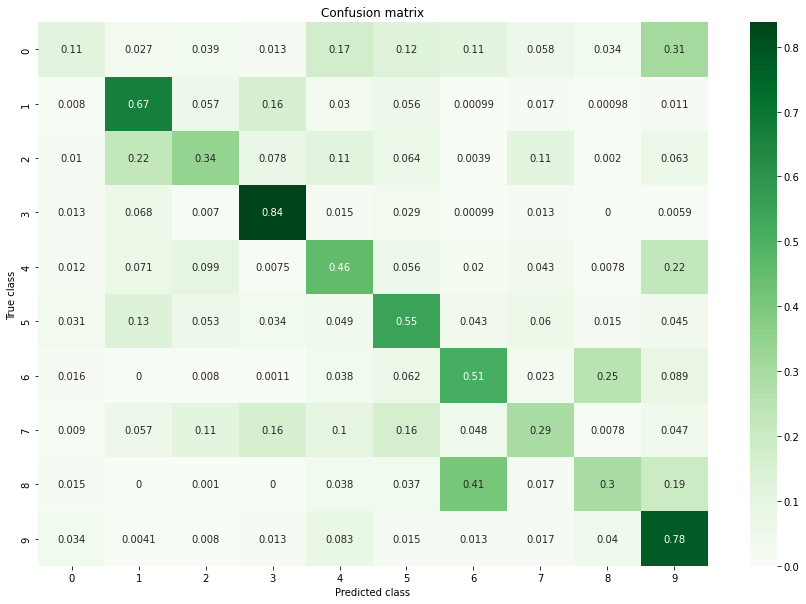

              precision    recall  f1-score   support

           0       0.44      0.11      0.18      1002
           1       0.53      0.67      0.59       987
           2       0.47      0.34      0.40      1000
           3       0.64      0.84      0.73       930
           4       0.41      0.46      0.43       986
           5       0.47      0.55      0.51      1008
           6       0.44      0.51      0.47      1015
           7       0.45      0.29      0.35       981
           8       0.45      0.30      0.36      1023
           9       0.44      0.78      0.56      1011

    accuracy                           0.48      9943
   macro avg       0.48      0.48      0.46      9943
weighted avg       0.47      0.48      0.46      9943



Resultados SVM Lineal2 en TEST:


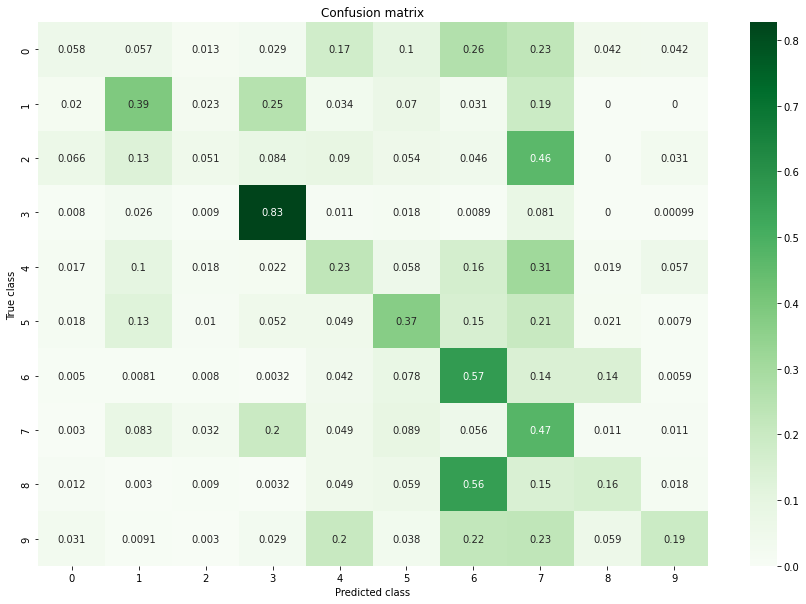

              precision    recall  f1-score   support

           0       0.24      0.06      0.09      1002
           1       0.42      0.39      0.40       987
           2       0.29      0.05      0.09      1000
           3       0.55      0.83      0.66       930
           4       0.25      0.23      0.24       986
           5       0.40      0.37      0.38      1008
           6       0.27      0.57      0.37      1015
           7       0.19      0.47      0.27       981
           8       0.35      0.16      0.22      1023
           9       0.53      0.19      0.28      1011

    accuracy                           0.33      9943
   macro avg       0.35      0.33      0.30      9943
weighted avg       0.35      0.33      0.30      9943



In [1221]:
print('Resultados SVM Lineal1 en TEST:')
mostrar_resultados('TEST', y_test, svm_lin1_predictions_test)

print('\n\nResultados SVM Lineal2 en TEST:')
mostrar_resultados('TEST', y_test, svm_lin2_predictions_test)

In [1222]:
acierto = accuracy_score(y_test, svm_lin1_predictions_test)
error = 1 - acierto

print('Score con SVM Lineal1 en TEST:\n-----------------------------')
print('Accuracy Test:', round(acierto*100,2),'%')
print('Error Test :', round(error*100,2),'%')


acierto = accuracy_score(y_test, svm_lin2_predictions_test)
error = 1 - acierto

print('\n\nScore con SVM Lineal2 en TEST:\n-----------------------------')
print('Accuracy Test:', round(acierto*100,2),'%')
print('Error Test :', round(error*100,2),'%')

Score con SVM Lineal1 en TEST:
-----------------------------
Accuracy Test: 48.17 %
Error Test : 51.83 %


Score con SVM Lineal2 en TEST:
-----------------------------
Accuracy Test: 32.75 %
Error Test : 67.25 %


### Guardo CSV con resultados obtenidos en SVM en TEST

In [1223]:
results_svm1 = pd.DataFrame(classification_report(y_true = y_test, y_pred = svm_lin1_predictions_test,output_dict=True)).transpose()

results_svm1 = results_svm1.add_prefix('SVM_Lin1_')

results_svm2 = pd.DataFrame(classification_report(y_true = y_test, y_pred = svm_lin2_predictions_test,output_dict=True)).transpose()

results_svm2 = results_svm2.add_prefix('SVM_Lin2_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,SVM_Lin2_precision,SVM_Lin2_recall,SVM_Lin2_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,0.243697,0.057884,0.093548
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,0.417391,0.389058,0.402727
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,0.289773,0.051000,0.086735
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,0.551650,0.826882,0.661790
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,0.245365,0.228195,0.236469
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,0.397028,0.371032,0.383590
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,0.274809,0.567488,0.370299
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,0.190692,0.471967,0.271634
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,0.349892,0.158358,0.218035
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,0.525745,0.191889,0.281159


In [1224]:
results_svm1.to_csv('models/svm_linear1_report_on_test.csv', index= True)

In [1225]:
results_svm2.to_csv('models/svm_linear2_report_on_test.csv', index= True)

In [1226]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en SVM Lineal

In [1227]:
# Incluyo sólo la OPCIÓN 1 de SVM lineal que es la que mejor resultado da
scores_obtained['SVM_Lin(%)'] = [accuracy_score(y_train, svm_lin1_predictions_train)*100,
                                    accuracy_score(y_test, svm_lin1_predictions_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%)
Accuracy_train,51.987714,58.558876,48.880888
Accuracy_test,51.161621,48.828321,48.174595


# 3.4. Ensemble con los modelos de RandomForest, Logistic Regression y SVM

### He desarrollado el ensemble en un notebook a parte por su peso,parte III del estudio.

### A continuación traigo aqui los resultados obtenidos para comparar con el resto de modelos:

In [1228]:
scores_obtained_ensemble = pd.read_csv('models/ensemble_accuracy_on_test.csv')
scores_obtained_ensemble = scores_obtained_ensemble.set_index('Unnamed: 0')
scores_obtained_ensemble

,Ensemble(%)
Unnamed: 0,
Accuracy_train,82.927566
Accuracy_test,53.374233


In [1229]:
scores_obtained = pd.concat([scores_obtained, scores_obtained_ensemble], axis=1)
scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%)
Accuracy_train,51.987714,58.558876,48.880888,82.927566
Accuracy_test,51.161621,48.828321,48.174595,53.374233


# 3.5. Ensemble RANDOM FOREST

### Importo librerias necesarias

In [1230]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

from sklearn.model_selection import cross_val_score


### Preparo el modelo Random Forest y lo entreno

In [1231]:
# Modelo RandomForest
rnd_clf = RandomForestClassifier()

# Entreno
rnd_clf.fit(X_train_scal, y_train)


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

#### Grid Search: para ver que parametros son más optimos en Random Forests

**max_ depth** profundidad máxima del árbol.

**min_samples_leaf** nº mínimo de muestras requeridas en un nodo hoja, esto puede tener el efecto de suavizar el modelo.

**n_estimators** nº de árboles en el bosque.

In [1232]:
'''
parameters = {'max_depth': [7,11,15,19], #este importante
            'min_samples_leaf': np.arange(2,6),
            #'max_leaf_nodes': [4,6,8,10,12,14,16],
            'n_estimators':[10, 30, 50, 70, 100]} 
            #"max_features": ["sqrt", 3, 4]} este important

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_rand = GridSearchCV(rnd_clf, parameters, scoring= 'accuracy', cv=10)

grid_rand.fit(X_train_scal, y_train.values.ravel())

print(grid_rand.best_estimator_)
print(grid_rand.best_score_)
print(grid_rand.best_params_)


PRIMER RESULTADO OBTENIDO:
RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200)
0.5387044020253126
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}

SEGUNDO RESULTADO OBTENIDO
RandomForestClassifier(max_depth=11, min_samples_leaf=3)
0.5626272601233059
{'max_depth': 11, 'min_samples_leaf': 3, 'n_estimators': 100}
'''

'\nparameters = {\'max_depth\': [7,11,15,19], #este importante\n            \'min_samples_leaf\': np.arange(2,6),\n            #\'max_leaf_nodes\': [4,6,8,10,12,14,16],\n            \'n_estimators\':[10, 30, 50, 70, 100]} \n            #"max_features": ["sqrt", 3, 4]} este important\n\n# Validacion cruzada con cv= 10, para suavizar el overfitting\ngrid_rand = GridSearchCV(rnd_clf, parameters, scoring= \'accuracy\', cv=10)\n\ngrid_rand.fit(X_train_scal, y_train.values.ravel())\n\nprint(grid_rand.best_estimator_)\nprint(grid_rand.best_score_)\nprint(grid_rand.best_params_)\n\n\nPRIMER RESULTADO OBTENIDO:\nRandomForestClassifier(max_depth=7, max_features=\'sqrt\', n_estimators=200)\n0.5387044020253126\n{\'max_depth\': 7, \'max_features\': \'sqrt\', \'n_estimators\': 200}\n\nSEGUNDO RESULTADO OBTENIDO\nRandomForestClassifier(max_depth=11, min_samples_leaf=3)\n0.5626272601233059\n{\'max_depth\': 11, \'min_samples_leaf\': 3, \'n_estimators\': 100}\n'

### Preparo de nuevo el modelo con los parametros más optimos detectados con el gridSearch

In [1233]:
# Modelo RandomForest OP 1
rnd_clf_opti = RandomForestClassifier(max_depth= 7,
                                    n_estimators=300, 
                                    max_features= 4)

# Entreno
rnd_clf_opti.fit(X_train_scal, y_train.values.ravel())

RandomForestClassifier(max_depth=7, max_features=4, n_estimators=300)

In [1234]:
# Modelo RandomForest OP 2
rnd_clf2 = RandomForestClassifier(max_depth= 15,
                                    n_estimators=35, 
                                    min_samples_leaf = 4)

# Entreno
rnd_clf2.fit(X_train_scal, y_train.values.ravel())

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=35)

In [1235]:
rnd_clf3 = RandomForestClassifier(max_depth= 11,
                                    n_estimators=100, 
                                    min_samples_leaf = 3)

# Entreno
rnd_clf3.fit(X_train_scal, y_train.values.ravel())

RandomForestClassifier(max_depth=11, min_samples_leaf=3)

### Atributos Random Forest

In [1236]:
rnd_clf_opti.feature_names_in_

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI',
       'key_SOL', 'key_SOL#'], dtype=object)

In [1237]:
rnd_clf_opti.feature_importances_

array([2.93557721e-01, 1.06272878e-01, 9.76225663e-02, 2.05922710e-02,
       9.81910889e-02, 8.82860698e-02, 4.93940921e-03, 1.25578697e-01,
       1.08838933e-02, 1.09124348e-01, 9.77118908e-03, 3.07552372e-02,
       1.65631068e-03, 2.52954238e-04, 2.10964487e-04, 3.08557149e-04,
       3.14136076e-04, 3.01125694e-04, 3.93752891e-04, 1.87949204e-04,
       1.62846918e-04, 3.61629855e-04, 2.74404665e-04])

### Feature Importance

In [1238]:
order_fea_imp = pd.Series(rnd_clf_opti.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

mode                0.010884
duration_ms         0.020592
valence             0.030755
instrumentalness    0.088286
danceability        0.097623
energy              0.098191
acousticness        0.106273
speechiness         0.109124
loudness            0.125579
popularity          0.293558
dtype: float64

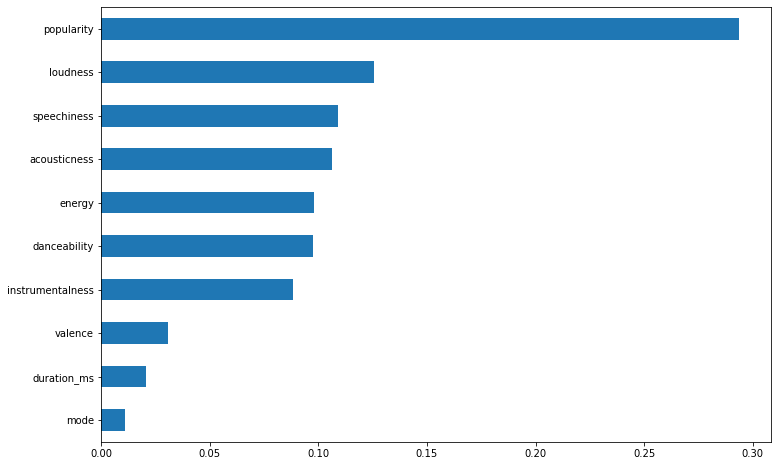

In [1239]:
# visualizo Feature Importance
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Predicción sobre TRAIN

In [1240]:
# Prediccion sobre TRAIN
y_pred_rf_train = rnd_clf_opti.predict(X_train_scal)

In [1241]:
y_pred_rf_train2 = rnd_clf2.predict(X_train_scal)

In [1242]:
y_pred_rf_train3 = rnd_clf3.predict(X_train_scal)

Resultados Random Forest en TRAIN:


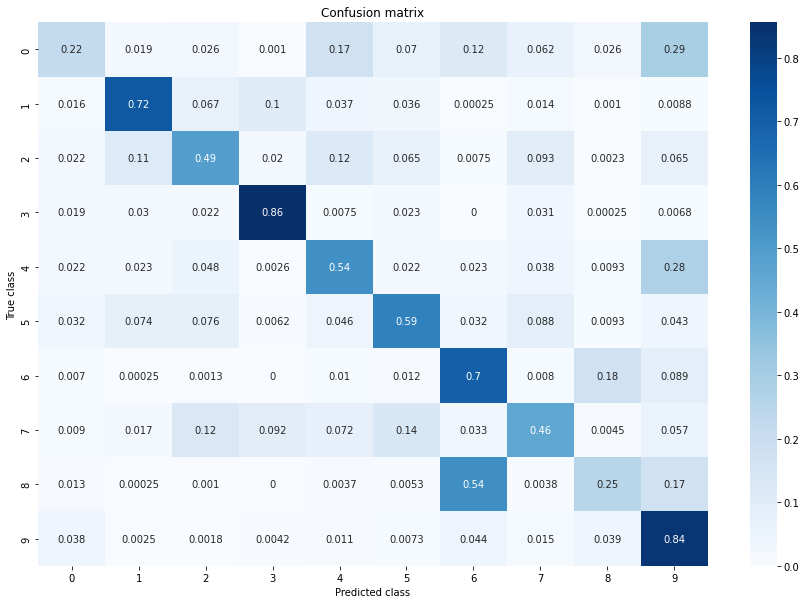

              precision    recall  f1-score   support

           0       0.55      0.22      0.31      3995
           1       0.72      0.72      0.72      3989
           2       0.57      0.49      0.53      3951
           3       0.79      0.86      0.82      3852
           4       0.53      0.54      0.54      4011
           5       0.61      0.59      0.60      3975
           6       0.47      0.70      0.56      3984
           7       0.57      0.46      0.51      3999
           8       0.49      0.25      0.33      3976
           9       0.45      0.84      0.59      3987

    accuracy                           0.57     39719
   macro avg       0.58      0.57      0.55     39719
weighted avg       0.57      0.57      0.55     39719



In [1243]:
print('Resultados Random Forest en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_rf_train)

Resultados Random Forest en TRAIN:


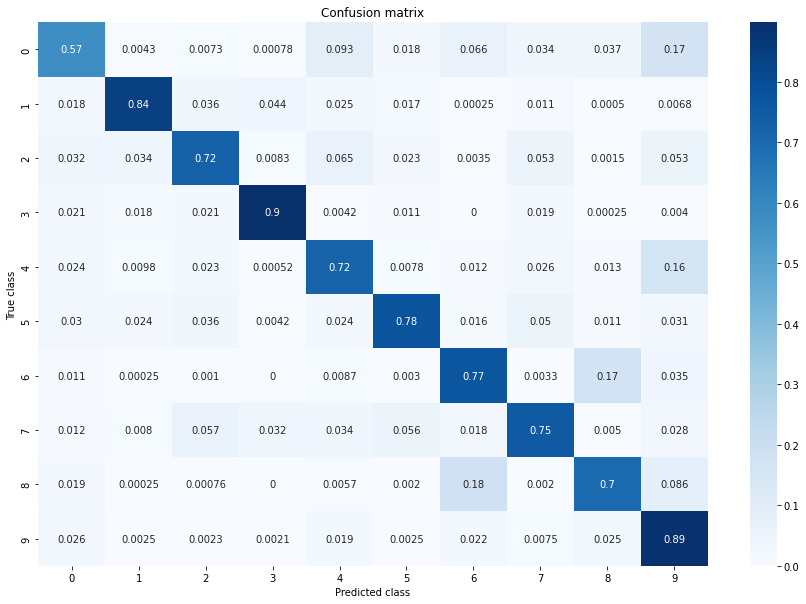

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      3995
           1       0.89      0.84      0.87      3989
           2       0.80      0.72      0.76      3951
           3       0.91      0.90      0.90      3852
           4       0.72      0.72      0.72      4011
           5       0.85      0.78      0.81      3975
           6       0.70      0.77      0.73      3984
           7       0.78      0.75      0.77      3999
           8       0.73      0.70      0.71      3976
           9       0.61      0.89      0.72      3987

    accuracy                           0.76     39719
   macro avg       0.77      0.76      0.76     39719
weighted avg       0.77      0.76      0.76     39719



In [1244]:
print('Resultados Random Forest en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_rf_train2)

Resultados Random Forest en TRAIN:


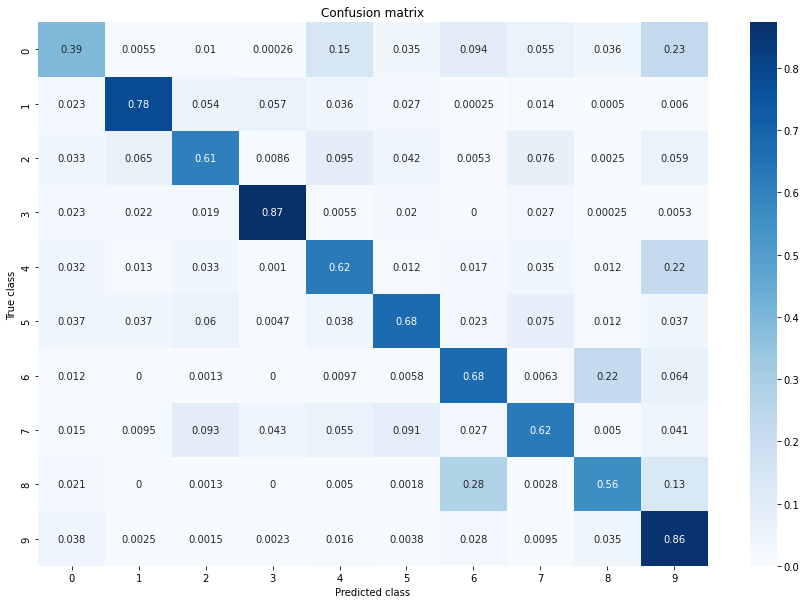

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      3995
           1       0.84      0.78      0.81      3989
           2       0.69      0.61      0.65      3951
           3       0.88      0.87      0.88      3852
           4       0.61      0.62      0.61      4011
           5       0.74      0.68      0.71      3975
           6       0.59      0.68      0.63      3984
           7       0.68      0.62      0.65      3999
           8       0.63      0.56      0.59      3976
           9       0.52      0.86      0.65      3987

    accuracy                           0.67     39719
   macro avg       0.68      0.67      0.67     39719
weighted avg       0.68      0.67      0.66     39719



In [1245]:
print('Resultados Random Forest en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_rf_train3)

In [1246]:
acierto = accuracy_score(y_train, y_pred_rf_train)
error = 1 - acierto

print('Score con Random Forest en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Random Forest en TRAIN:
-----------------------------
Accuracy Train: 56.61 %
Error Train : 43.39 %


In [1247]:
acierto = accuracy_score(y_train, y_pred_rf_train2)
error = 1 - acierto

print('Score con Random Forest en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Random Forest en TRAIN:
-----------------------------
Accuracy Train: 76.42 %
Error Train : 23.58 %


In [1248]:
acierto = accuracy_score(y_train, y_pred_rf_train3)
error = 1 - acierto

print('Score con Random Forest en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Random Forest en TRAIN:
-----------------------------
Accuracy Train: 66.74 %
Error Train : 33.26 %


### Predicción sobre TEST

In [1249]:
# Prediccion en Test
y_pred_rf_test = rnd_clf_opti.predict(X_test_scal)


In [1250]:
y_pred_rf_test2 = rnd_clf2.predict(X_test_scal)

In [1251]:
y_pred_rf_test3 = rnd_clf3.predict(X_test_scal)

Resultados Random Forest en TEST:


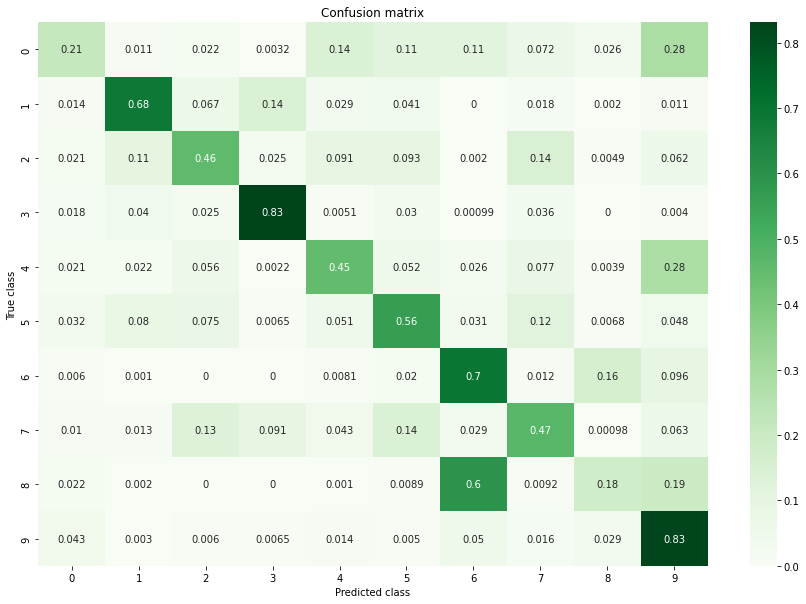

              precision    recall  f1-score   support

           0       0.53      0.21      0.30      1002
           1       0.71      0.68      0.70       987
           2       0.54      0.46      0.50      1000
           3       0.75      0.83      0.79       930
           4       0.54      0.45      0.49       986
           5       0.53      0.56      0.54      1008
           6       0.45      0.70      0.55      1015
           7       0.48      0.47      0.48       981
           8       0.43      0.18      0.25      1023
           9       0.44      0.83      0.58      1011

    accuracy                           0.53      9943
   macro avg       0.54      0.54      0.52      9943
weighted avg       0.54      0.53      0.51      9943



In [1252]:
print('Resultados Random Forest en TEST:')
mostrar_resultados('TEST', y_test, y_pred_rf_test)

Resultados Random Forest en TEST:


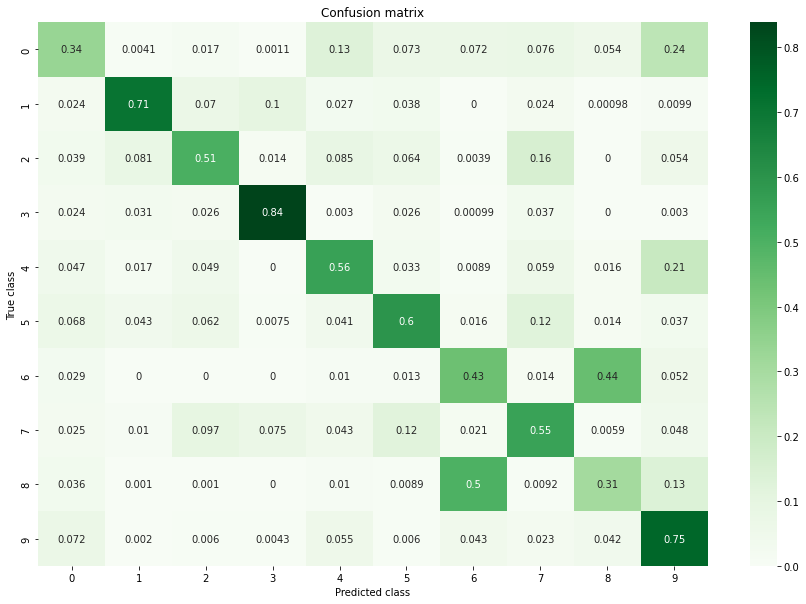

              precision    recall  f1-score   support

           0       0.48      0.34      0.40      1002
           1       0.79      0.71      0.75       987
           2       0.61      0.51      0.55      1000
           3       0.81      0.84      0.82       930
           4       0.58      0.56      0.57       986
           5       0.61      0.60      0.60      1008
           6       0.39      0.43      0.41      1015
           7       0.51      0.55      0.53       981
           8       0.35      0.31      0.33      1023
           9       0.49      0.75      0.59      1011

    accuracy                           0.56      9943
   macro avg       0.56      0.56      0.56      9943
weighted avg       0.56      0.56      0.55      9943



In [1253]:
print('Resultados Random Forest en TEST:')
mostrar_resultados('TEST', y_test, y_pred_rf_test2)

Resultados Random Forest en TEST:


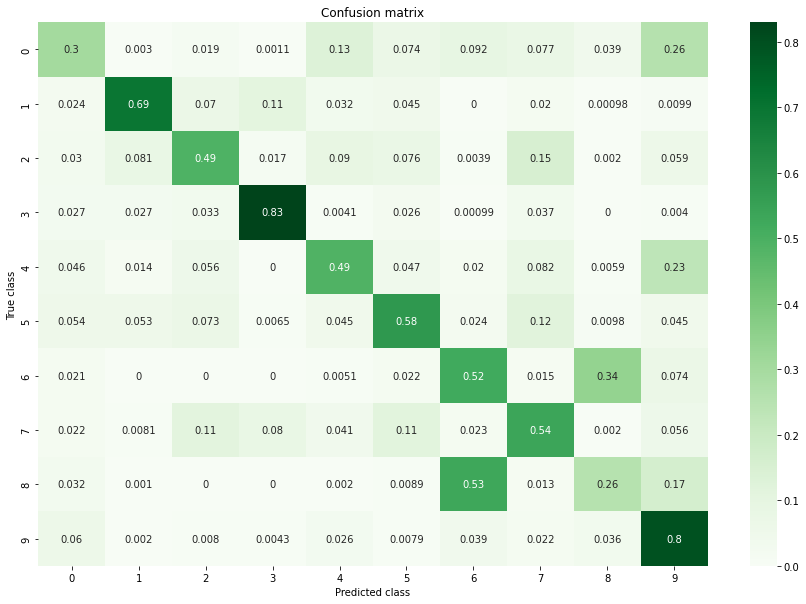

              precision    recall  f1-score   support

           0       0.49      0.30      0.37      1002
           1       0.79      0.69      0.74       987
           2       0.57      0.49      0.53      1000
           3       0.79      0.83      0.81       930
           4       0.56      0.49      0.52       986
           5       0.58      0.58      0.58      1008
           6       0.41      0.52      0.46      1015
           7       0.50      0.54      0.52       981
           8       0.37      0.26      0.30      1023
           9       0.47      0.80      0.59      1011

    accuracy                           0.55      9943
   macro avg       0.55      0.55      0.54      9943
weighted avg       0.55      0.55      0.54      9943



In [1254]:
print('Resultados Random Forest en TEST:')
mostrar_resultados('TEST', y_test, y_pred_rf_test3)

In [1255]:
acierto = accuracy_score(y_test, y_pred_rf_test)
error = 1 - acierto

print('Score Random Forest en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Random Forest en TEST:
-----------------------------
Accuracy test: 53.41 %
Error test: 46.59 %


In [1256]:
acierto = accuracy_score(y_test, y_pred_rf_test2)
error = 1 - acierto

print('Score Random Forest en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Random Forest en TEST:
-----------------------------
Accuracy test: 55.6 %
Error test: 44.4 %


In [1257]:
acierto = accuracy_score(y_test, y_pred_rf_test3)
error = 1 - acierto

print('Score Random Forest en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Random Forest en TEST:
-----------------------------
Accuracy test: 54.68 %
Error test: 45.32 %


### Guardo CSV con resultados obtenidos en Random Forest en TEST

In [1258]:
results_random = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_rf_test,output_dict=True)).transpose()
results_random2 = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_rf_test2,output_dict=True)).transpose()
results_random3 = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_rf_test3,output_dict=True)).transpose()

results_random = results_random.add_prefix('RandomForest1_')
results_random2 = results_random2.add_prefix('RandomForest2_')
results_random3 = results_random3.add_prefix('RandomForest3_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_random2.iloc[:,0:-1], results_random3.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,SVM_Lin2_f1-score,RandomForest1_precision,RandomForest1_recall,RandomForest1_f1-score,RandomForest2_precision,RandomForest2_recall,RandomForest2_f1-score,RandomForest3_precision,RandomForest3_recall,RandomForest3_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,...,0.093548,0.531328,0.211577,0.302641,0.481481,0.337325,0.396714,0.489499,0.302395,0.373843
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,...,0.402727,0.710665,0.681864,0.695967,0.789177,0.709220,0.747065,0.785550,0.694022,0.736955
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,...,0.086735,0.544696,0.457000,0.497009,0.607186,0.507000,0.552589,0.568946,0.491000,0.527107
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,...,0.661790,0.750485,0.831183,0.788776,0.805785,0.838710,0.821918,0.793422,0.830108,0.811350
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,...,0.236469,0.541463,0.450304,0.491694,0.580508,0.555781,0.567876,0.564403,0.488844,0.523913
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,...,0.383590,0.526168,0.558532,0.541867,0.610942,0.598214,0.604511,0.579782,0.580357,0.580069
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,...,0.370299,0.451181,0.696552,0.547637,0.394808,0.434483,0.413696,0.414961,0.519212,0.461269
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,...,0.271634,0.484880,0.474006,0.479381,0.514259,0.551478,0.532218,0.499526,0.537207,0.517682
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,...,0.218035,0.428571,0.175953,0.249480,0.346622,0.305963,0.325026,0.368124,0.255132,0.301386
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,...,0.281159,0.442389,0.827893,0.576645,0.489018,0.748764,0.591637,0.467714,0.795252,0.589011


In [1259]:
results_random.to_csv('models/random_forest_report_on_test.csv', index= True)

In [1260]:
results_random2.to_csv('models/random_forest2_report_on_test.csv', index= True)

In [1261]:
results_random3.to_csv('models/random_forest3_report_on_test.csv', index= True)

In [1262]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Random Forest

In [1263]:
# Incluyo sólo la OPCIÓN 2 de Random Forest que es la que mejor resultado da
scores_obtained['Random_Forest(%)'] = [accuracy_score(y_train, y_pred_rf_train2)*100,
                                    accuracy_score(y_test, y_pred_rf_test2)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%)
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902


# 3.6. ADABOOST

### Importo librerias

In [1264]:
from sklearn.ensemble import AdaBoostClassifier

### Preparo y entreno el modelo de Adaptive Boosting

In [1265]:
# Arbol sencillo con 1 nivel de profundidad, con 200 arboles
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                algorithm='SAMME.R', learning_rate=0.5)

# Entreno con TRAIN
ada_clf.fit(X_train_scal,y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### Feature Importance

In [1266]:
order_fea_imp = pd.Series(ada_clf.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

liveness            0.030
duration_ms         0.070
valence             0.075
energy              0.075
instrumentalness    0.090
danceability        0.090
acousticness        0.090
speechiness         0.095
loudness            0.095
popularity          0.205
dtype: float64

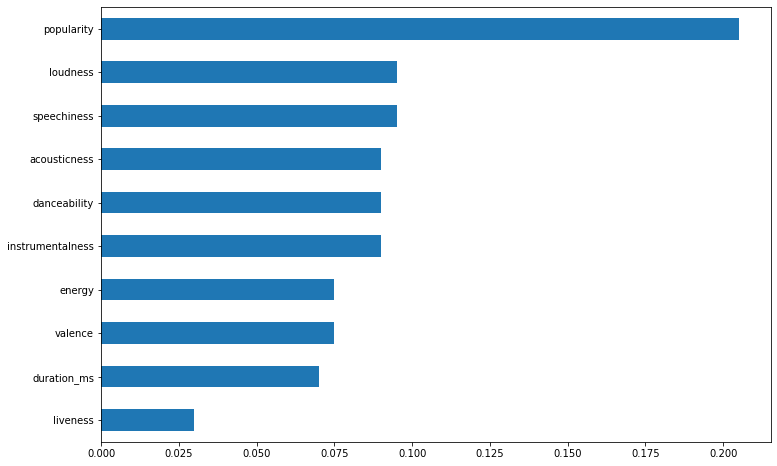

In [1267]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [1268]:
# Prediccion sobre TRAIN
y_pred_ada_train =ada_clf.predict(X_train_scal)

Resultados Ada Boosting en TRAIN:


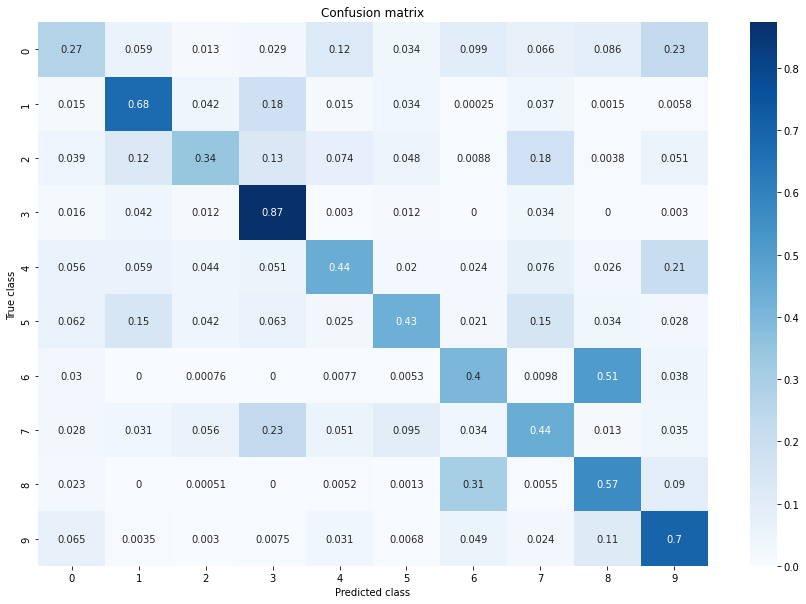

              precision    recall  f1-score   support

           0       0.45      0.27      0.34      3995
           1       0.59      0.68      0.63      3989
           2       0.62      0.34      0.44      3951
           3       0.56      0.87      0.68      3852
           4       0.57      0.44      0.50      4011
           5       0.63      0.43      0.51      3975
           6       0.43      0.40      0.41      3984
           7       0.43      0.44      0.44      3999
           8       0.42      0.57      0.48      3976
           9       0.51      0.70      0.59      3987

    accuracy                           0.51     39719
   macro avg       0.52      0.51      0.50     39719
weighted avg       0.52      0.51      0.50     39719



In [1269]:
print('Resultados Ada Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_ada_train)

In [1270]:
acierto = accuracy_score(y_train, y_pred_ada_train)
error = 1 - acierto

print('Score con Ada Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Ada Boosting en TRAIN:
-----------------------------
Accuracy Train: 51.28 %
Error Train : 48.72 %


### Predicción sobre TEST

In [1271]:
# Prediccion en Test
y_pred_ada_test = ada_clf.predict(X_test_scal)


Resultados Ada Boosting en TEST:


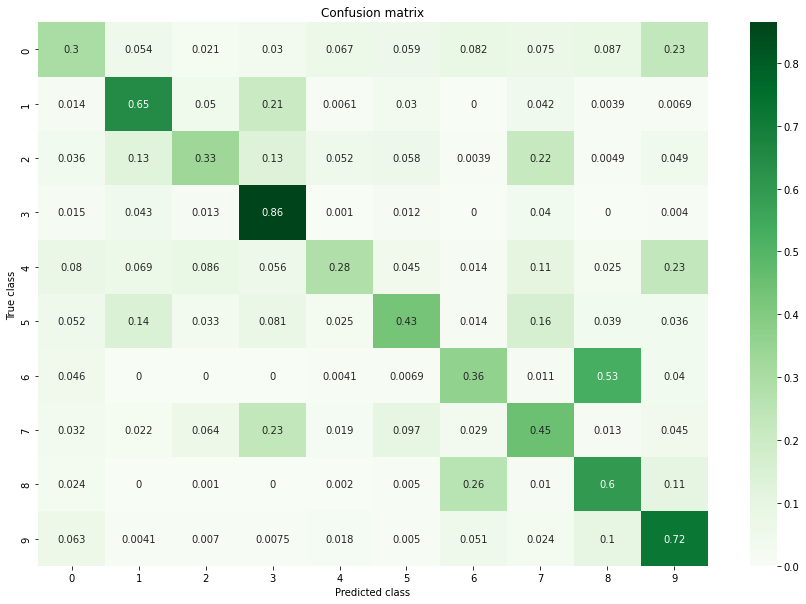

              precision    recall  f1-score   support

           0       0.45      0.30      0.36      1002
           1       0.58      0.65      0.61       987
           2       0.55      0.33      0.42      1000
           3       0.53      0.86      0.66       930
           4       0.59      0.28      0.38       986
           5       0.58      0.43      0.49      1008
           6       0.44      0.36      0.40      1015
           7       0.40      0.45      0.42       981
           8       0.43      0.60      0.50      1023
           9       0.49      0.72      0.59      1011

    accuracy                           0.50      9943
   macro avg       0.50      0.50      0.48      9943
weighted avg       0.50      0.50      0.48      9943



In [1272]:
print('Resultados Ada Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_ada_test)

In [1273]:
acierto = accuracy_score(y_test, y_pred_ada_test)
error = 1 - acierto

print('Score Ada Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Ada Boosting en TEST:
-----------------------------
Accuracy test: 49.62 %
Error test: 50.38 %


### Guardo CSV con resultados obtenidos en Ada Boosting en TEST

In [1274]:
results_adaboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_ada_test,output_dict=True)).transpose()

results_adaboost = results_adaboost.add_prefix('AdaBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,SVM_Lin2_precision,SVM_Lin2_recall,SVM_Lin2_f1-score,RandomForest1_precision,RandomForest1_recall,RandomForest1_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,0.243697,0.057884,0.093548,0.531328,0.211577,0.302641,0.452345,0.298403,0.359591
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,0.417391,0.389058,0.402727,0.710665,0.681864,0.695967,0.583181,0.646403,0.613167
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,0.289773,0.051000,0.086735,0.544696,0.457000,0.497009,0.548440,0.334000,0.415165
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,0.551650,0.826882,0.661790,0.750485,0.831183,0.788776,0.534930,0.864516,0.660912
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,0.245365,0.228195,0.236469,0.541463,0.450304,0.491694,0.590618,0.280933,0.380756
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,0.397028,0.371032,0.383590,0.526168,0.558532,0.541867,0.575798,0.429563,0.492045
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,0.274809,0.567488,0.370299,0.451181,0.696552,0.547637,0.444175,0.360591,0.398042
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,0.190692,0.471967,0.271634,0.484880,0.474006,0.479381,0.395889,0.451580,0.421905
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,0.349892,0.158358,0.218035,0.428571,0.175953,0.249480,0.426974,0.597263,0.497963
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,0.525745,0.191889,0.281159,0.442389,0.827893,0.576645,0.492235,0.721068,0.585072


In [1275]:
results_adaboost.to_csv('models/ada_boosting_report_on_test.csv', index= True)

In [1276]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Ada Boosting

In [1277]:
scores_obtained['Ada Boosting(%)'] = [accuracy_score(y_train, y_pred_ada_train)*100,
                                    accuracy_score(y_test, y_pred_ada_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%),Ada Boosting(%)
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864,51.280244
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902,49.622850


# 3.7. GRADIENT BOOSTING CLASIFFIER

### Importo librerias

In [1278]:
from sklearn.ensemble import GradientBoostingClassifier

### Preparo el modelo y lo entreno

In [1279]:
# Modelo Gradient Boosting
grad_boost_clf = GradientBoostingClassifier()

# Entreno
grad_boost_clf.fit(X_train_scal, y_train.values.ravel())

GradientBoostingClassifier()

### Grid Search para detectar que parametros son los más optimos

In [1280]:
'''
parameters = {#"learning_rate": [0.1, 0.3],  # Cuanto más alto, mas aporta cada nuevo arbol
            "n_estimators": [50,100]} # No pongo muchos estimadores para no sobreajustar el modelo
            #"max_depth": [2,3], # No es necesario poner una profundiad muy alta, cada nuevo arbol va corrigiendo el error de los anteriores.
            #"max_features": ["sqrt", 3]} # Igual que en el random forest

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_gradient = GridSearchCV(grad_boost_clf, parameters, scoring= 'accuracy', cv=10)

grid_gradient.fit(X_train_scal, y_train.values.ravel())

print(grid_gradient.best_estimator_)
print(grid_gradient.best_score_)
print(grid_gradient.best_params_)
'''

'\nparameters = {#"learning_rate": [0.1, 0.3],  # Cuanto más alto, mas aporta cada nuevo arbol\n            "n_estimators": [50,100]} # No pongo muchos estimadores para no sobreajustar el modelo\n            #"max_depth": [2,3], # No es necesario poner una profundiad muy alta, cada nuevo arbol va corrigiendo el error de los anteriores.\n            #"max_features": ["sqrt", 3]} # Igual que en el random forest\n\n# Validacion cruzada con cv= 10, para suavizar el overfitting\ngrid_gradient = GridSearchCV(grad_boost_clf, parameters, scoring= \'accuracy\', cv=10)\n\ngrid_gradient.fit(X_train_scal, y_train.values.ravel())\n\nprint(grid_gradient.best_estimator_)\nprint(grid_gradient.best_score_)\nprint(grid_gradient.best_params_)\n'

### Preparo de nuevo el modelo con los parametros más optimos detectados con el gridSearch

In [1281]:
# Modelo Gradient Boosting
grad_boost_clf_opti = GradientBoostingClassifier(learning_rate= 0.3, n_estimators= 100, max_features= 4)

# Entreno
grad_boost_clf_opti.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.3, max_features=4)

### Feature Importance

In [1282]:
order_fea_imp = pd.Series(grad_boost_clf_opti.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

tempo               0.014944
duration_ms         0.029834
valence             0.044850
loudness            0.075267
energy              0.081681
acousticness        0.087449
speechiness         0.093665
danceability        0.095354
instrumentalness    0.126135
popularity          0.320586
dtype: float64

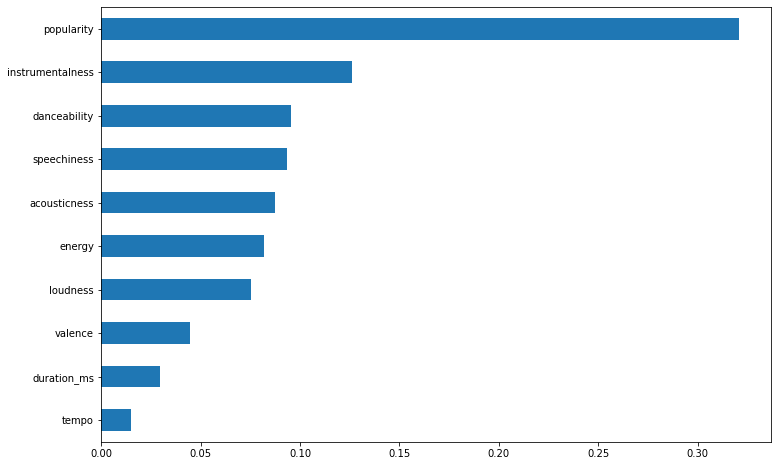

In [1283]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [1284]:
# Prediccion sobre TRAIN
y_pred_grad_train = grad_boost_clf_opti.predict(X_train_scal)


Resultados Gradient Boosting en TRAIN:


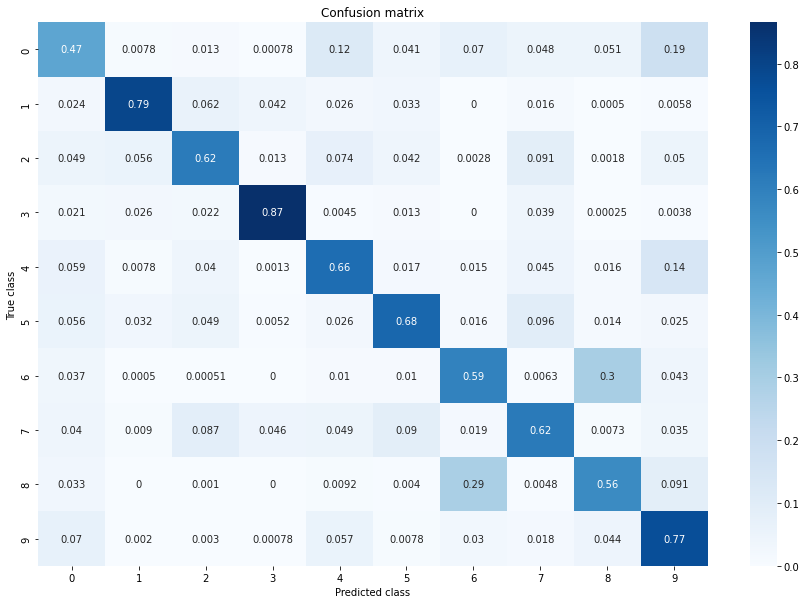

              precision    recall  f1-score   support

           0       0.55      0.47      0.50      3995
           1       0.85      0.79      0.82      3989
           2       0.69      0.62      0.65      3951
           3       0.89      0.87      0.88      3852
           4       0.64      0.66      0.65      4011
           5       0.72      0.68      0.70      3975
           6       0.57      0.59      0.58      3984
           7       0.63      0.62      0.63      3999
           8       0.57      0.56      0.56      3976
           9       0.57      0.77      0.65      3987

    accuracy                           0.66     39719
   macro avg       0.67      0.66      0.66     39719
weighted avg       0.67      0.66      0.66     39719



In [1285]:
print('Resultados Gradient Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_grad_train)

In [1286]:
acierto = accuracy_score(y_train, y_pred_grad_train)
error = 1 - acierto

print('Score con Gradient Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Gradient Boosting en TRAIN:
-----------------------------
Accuracy Train: 66.27 %
Error Train : 33.73 %


### Predicción sobre TEST

In [1287]:
# Prediccion en Test
y_pred_grad_test = grad_boost_clf_opti.predict(X_test_scal)


Resultados Gradient Boosting en TEST:


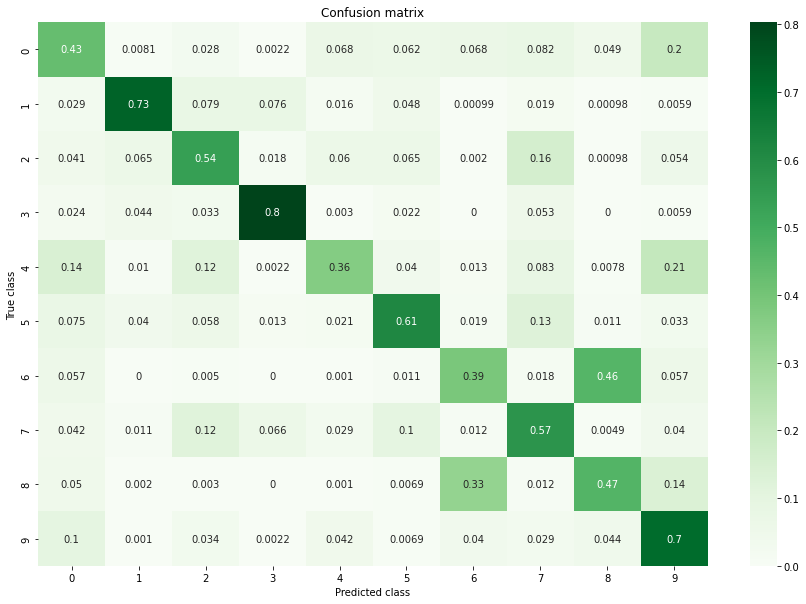

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1002
           1       0.80      0.73      0.76       987
           2       0.53      0.54      0.54      1000
           3       0.82      0.80      0.81       930
           4       0.60      0.36      0.45       986
           5       0.63      0.61      0.62      1008
           6       0.44      0.39      0.41      1015
           7       0.50      0.57      0.53       981
           8       0.44      0.47      0.45      1023
           9       0.49      0.70      0.58      1011

    accuracy                           0.56      9943
   macro avg       0.57      0.56      0.56      9943
weighted avg       0.57      0.56      0.56      9943



In [1288]:
print('Resultados Gradient Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_grad_test)

In [1289]:
acierto = accuracy_score(y_test, y_pred_grad_test)
error = 1 - acierto

print('Score Gradient Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Gradient Boosting en TEST:
-----------------------------
Accuracy test: 55.83 %
Error test: 44.17 %


### Guardo CSV con resultados obtenidos en Gradient Boosting en TEST

In [1290]:
results_gradboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_grad_test,output_dict=True)).transpose()

results_gradboost = results_gradboost.add_prefix('GradBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1], results_gradboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,SVM_Lin2_f1-score,RandomForest1_precision,RandomForest1_recall,RandomForest1_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score,GradBoost_precision,GradBoost_recall,GradBoost_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,...,0.093548,0.531328,0.211577,0.302641,0.452345,0.298403,0.359591,0.433333,0.428144,0.430723
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,...,0.402727,0.710665,0.681864,0.695967,0.583181,0.646403,0.613167,0.801117,0.726444,0.761955
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,...,0.086735,0.544696,0.457000,0.497009,0.548440,0.334000,0.415165,0.531558,0.539000,0.535253
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,...,0.661790,0.750485,0.831183,0.788776,0.534930,0.864516,0.660912,0.817287,0.803226,0.810195
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,...,0.236469,0.541463,0.450304,0.491694,0.590618,0.280933,0.380756,0.601340,0.364097,0.453569
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,...,0.383590,0.526168,0.558532,0.541867,0.575798,0.429563,0.492045,0.628310,0.612103,0.620101
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,...,0.370299,0.451181,0.696552,0.547637,0.444175,0.360591,0.398042,0.443439,0.386207,0.412849
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,...,0.271634,0.484880,0.474006,0.479381,0.395889,0.451580,0.421905,0.497350,0.573904,0.532892
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,...,0.218035,0.428571,0.175953,0.249480,0.426974,0.597263,0.497963,0.444860,0.465298,0.454849
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,...,0.281159,0.442389,0.827893,0.576645,0.492235,0.721068,0.585072,0.486007,0.704253,0.575121


In [1291]:
results_gradboost.to_csv('models/gradient_boosting_report_on_test.csv', index= True)

In [1292]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Gradient Boosting

In [1293]:
scores_obtained['Gradient Boosting(%)'] = [accuracy_score(y_train, y_pred_grad_train)*100,
                                    accuracy_score(y_test, y_pred_grad_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%)
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864,51.280244,66.265515
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902,49.622850,55.828221


# 3.8. XG BOOSTING CLASIFFIER

### Importo librerias

In [1294]:
from xgboost import XGBClassifier

### Preparo el modelo y entreno

In [1295]:

# Modelo XG Boosting
xgboost_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric = 'logloss')

xgboost_clf.fit(X_train_scal, y_train.values.ravel())
#results_xgb = model_selection.cross_val_score(model, X_train_scal, y_train, cv=10).mean()
#results_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

### Feature Importance

In [1296]:
order_fea_imp = pd.Series(xgboost_clf.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

duration_ms         0.028624
energy              0.033620
valence             0.039738
danceability        0.056394
acousticness        0.059716
instrumentalness    0.067480
speechiness         0.074410
mode                0.076222
loudness            0.098250
popularity          0.233382
dtype: float32

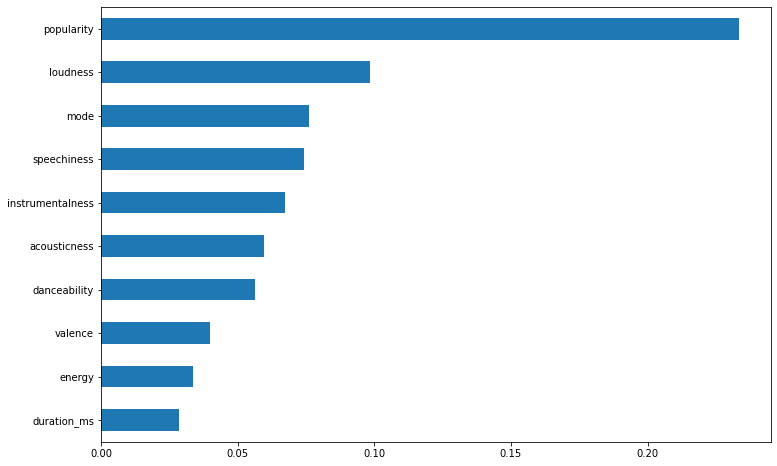

In [1297]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [1298]:
# Prediccion sobre TRAIN
y_pred_xgboost_train = xgboost_clf.predict(X_train_scal)


Resultados XG Boosting en TRAIN:


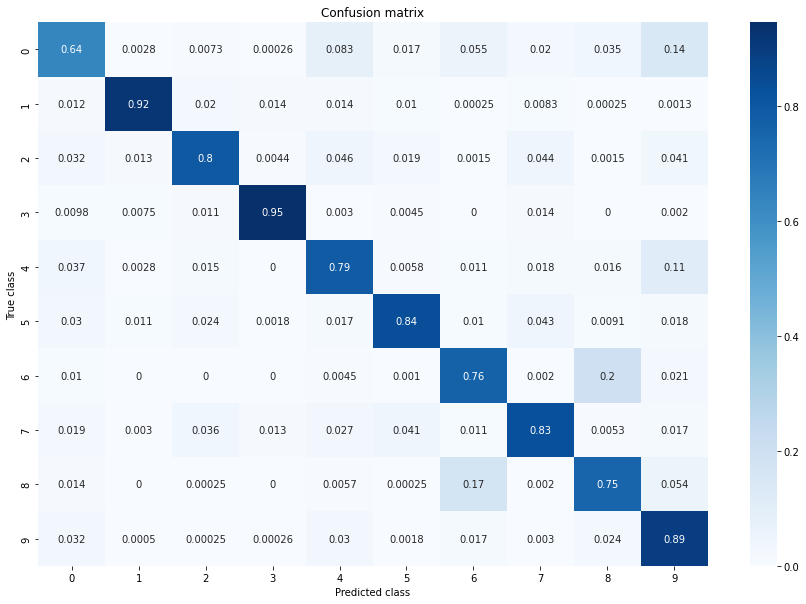

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      3995
           1       0.96      0.92      0.94      3989
           2       0.87      0.80      0.83      3951
           3       0.97      0.95      0.96      3852
           4       0.77      0.79      0.78      4011
           5       0.89      0.84      0.86      3975
           6       0.73      0.76      0.75      3984
           7       0.84      0.83      0.84      3999
           8       0.72      0.75      0.74      3976
           9       0.69      0.89      0.78      3987

    accuracy                           0.82     39719
   macro avg       0.82      0.82      0.82     39719
weighted avg       0.82      0.82      0.82     39719



In [1299]:
print('Resultados XG Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_xgboost_train)

In [1300]:
acierto = accuracy_score(y_train, y_pred_xgboost_train)
error = 1 - acierto

print('Score con XG Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con XG Boosting en TRAIN:
-----------------------------
Accuracy Train: 81.55 %
Error Train : 18.45 %


### Predicción sobre TEST

In [1301]:
# Prediccion en Test
y_pred_xgboost_test = xgboost_clf.predict(X_test_scal)


Resultados XG Boosting en TEST:


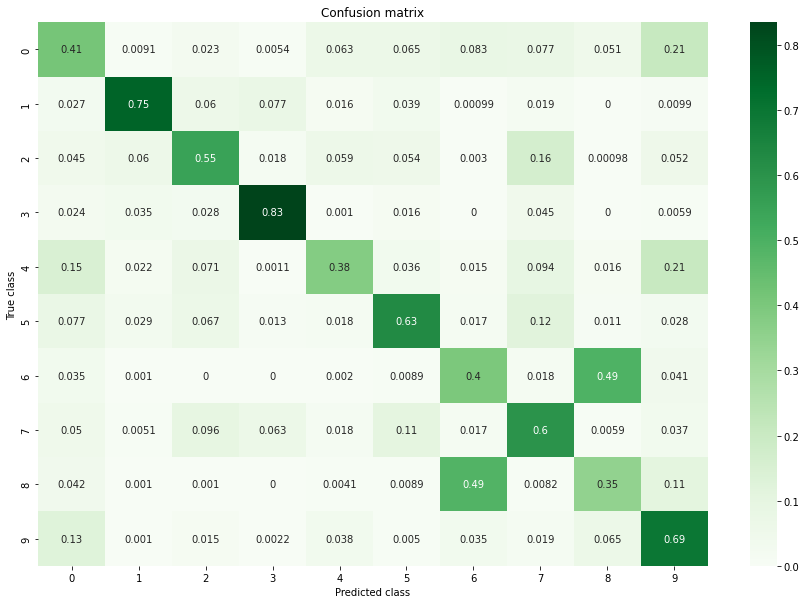

              precision    recall  f1-score   support

           0       0.42      0.41      0.41      1002
           1       0.82      0.75      0.79       987
           2       0.60      0.55      0.57      1000
           3       0.82      0.83      0.83       930
           4       0.63      0.38      0.48       986
           5       0.65      0.63      0.64      1008
           6       0.38      0.40      0.39      1015
           7       0.51      0.60      0.55       981
           8       0.35      0.35      0.35      1023
           9       0.50      0.69      0.58      1011

    accuracy                           0.56      9943
   macro avg       0.57      0.56      0.56      9943
weighted avg       0.57      0.56      0.56      9943



In [1302]:
print('Resultados XG Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_xgboost_test)

In [1303]:
acierto = accuracy_score(y_test, y_pred_xgboost_test)
error = 1 - acierto

print('Score XG Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score XG Boosting en TEST:
-----------------------------
Accuracy test: 55.67 %
Error test: 44.33 %


### Guardo CSV con resultados obtenidos en XG Boosting en TEST

In [1304]:
results_xgboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_test,output_dict=True)).transpose()

results_xgboost = results_xgboost.add_prefix('XGBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1], results_gradboost.iloc[:,0:-1], results_xgboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,RandomForest1_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score,GradBoost_precision,GradBoost_recall,GradBoost_f1-score,XGBoost_precision,XGBoost_recall,XGBoost_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,...,0.302641,0.452345,0.298403,0.359591,0.433333,0.428144,0.430723,0.416582,0.411178,0.413862
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,...,0.695967,0.583181,0.646403,0.613167,0.801117,0.726444,0.761955,0.820994,0.752786,0.785412
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,...,0.497009,0.548440,0.334000,0.415165,0.531558,0.539000,0.535253,0.603297,0.549000,0.574869
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,...,0.788776,0.534930,0.864516,0.660912,0.817287,0.803226,0.810195,0.822034,0.834409,0.828175
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,...,0.491694,0.590618,0.280933,0.380756,0.601340,0.364097,0.453569,0.634518,0.380325,0.475587
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,...,0.541867,0.575798,0.429563,0.492045,0.628310,0.612103,0.620101,0.650565,0.627976,0.639071
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,...,0.547637,0.444175,0.360591,0.398042,0.443439,0.386207,0.412849,0.377218,0.398030,0.387344
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,...,0.479381,0.395889,0.451580,0.421905,0.497350,0.573904,0.532892,0.514912,0.598369,0.553512
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,...,0.249480,0.426974,0.597263,0.497963,0.444860,0.465298,0.454849,0.349802,0.346041,0.347912
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,...,0.576645,0.492235,0.721068,0.585072,0.486007,0.704253,0.575121,0.498580,0.694362,0.580405


In [1305]:
results_xgboost.to_csv('models/xg_boosting_report_on_test.csv', index= True)

In [1306]:
results_models.to_csv('models/models_report_on_test.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en XG Boosting

In [1307]:
scores_obtained['XG Boosting(%)'] = [accuracy_score(y_train, y_pred_xgboost_train)*100,
                                    accuracy_score(y_test, y_pred_xgboost_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%),XG Boosting(%)
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864,51.280244,66.265515,81.552909
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902,49.622850,55.828221,55.667304


In [1308]:
scores_obtained.to_csv('models/scores_accuracy_ML.csv', index= True)

# 3.9. Red Neuronal: Multilayer Perceptron Classifier

### Desarrollado modelo de red neuronal con Perceptron en notebook Parte IV del estudio.

### Alli, se desarrolla la comparativa de todos los modelos